In [1]:
# Connecting google colab with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Read the 'Telco_customer_churn.csv' file as df
df = pd.read_csv('/content/drive/MyDrive/Datasets/Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Get the shape of the data frame object
df.shape

(7043, 21)

In [5]:
# Get the column names of the data frame object
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Check the class-wise distribution of the 'Churn' column
df['Churn'].value_counts()

# Observe that Churn-Yes is approximately 3 times of Churn-No indicating class imbalance

,count
Churn,
No,5174
Yes,1869


In [7]:
# Drop the 'customerID' column from the data frame object
df.drop('customerID', axis = 'columns', inplace = True)
df.shape

(7043, 20)

In [8]:
# Check for missing values in the data frame
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [9]:
# Check the column types of the data frame object
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


### Data manipulation and Cleaning:

* Convert the 'TotalCharges' column into numeric form
* Some entries in 'TotalCharges' are just ' '
* We need to handle them as they can't be converted into numeric form
* So, first get true or false depending the value is missing or not
* Drop rows for which the 'TotalCharges' column is ' '
* Then convert them into numeric form and save the data frame as df1


In [10]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull() # Gives true for missing values and false otherwise

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [11]:
# Get the entries where 'TotalCharges' column is missing
print(len(df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]))
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
# Drop those 11 rows and create another data frame df1
df1 = df[df['TotalCharges'] != ' ']
df1.shape # Rows and dropped successfully

(7032, 20)

In [13]:
# Now, convert the 'TotalCharges' into numeric format
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])
df1.dtypes # The 'TotalCharges' column converted into numeric form

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


### Create some data visualization in order to explore the data set in great detail

* Create histogram for tenurs of customers leaving and not-leaving
* Create histogram for monthly charges vs. churn

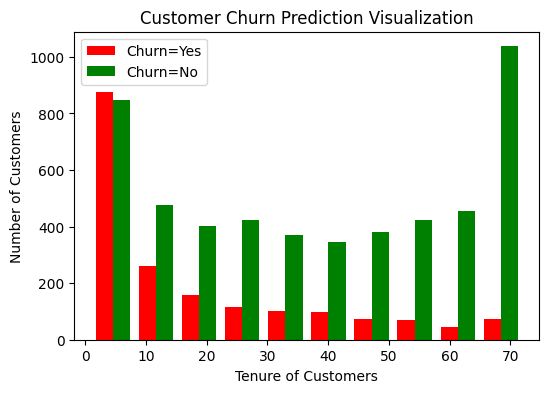

In [14]:
# Tensure of customers leaving the company
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

# Tensure of customers not-leaving the company
tenure_churn_no = df1[df1.Churn == 'No'].tenure

# Now plot a side by side histogram to know the distribution of customers behavious based on their tenure
plt.figure(figsize = (6,4))
plt.xlabel('Tenure of Customers')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red', 'green'], label = ['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()

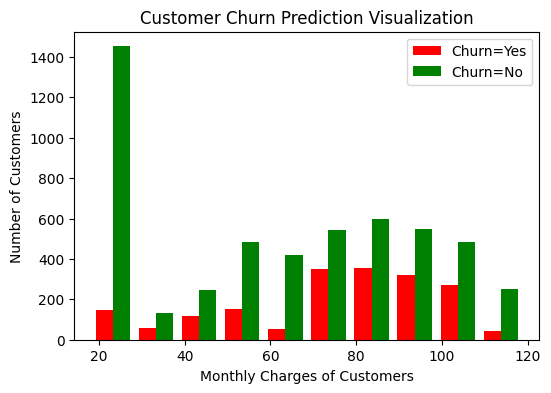

In [15]:
# Monthly Charges of customers leaving the company
monthcharge_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

# Monthly Charges of customers not-leaving the company
monthcharge_churn_no = df1[df1.Churn == 'No'].MonthlyCharges

# Now plot a side by side histogram to know the distribution of customers behavious based on their tenure
plt.figure(figsize = (6,4))
plt.xlabel('Monthly Charges of Customers')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([monthcharge_churn_yes, monthcharge_churn_no], color = ['red', 'green'], label = ['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()

### Pre-processing data:

* In this section, we will observe the categorical variables and will do one hot encoding or dummy encoding to give the categorical variables a numeric scense
* Define a function to get the unique entries of categorical columns
* Apply the function on df1 data frame
* Now replace 'No internet service' and 'No phone service' with 'no' using the pandas replace method.
* Convet the gender column in numeric form. 1 for female, 0 for male
* Convert the other columns having more than two unique entries into numeric form using pd.get_dummies method
* Convert the boolean type into uint8 type

In [16]:
# Define a function as get_unique_col_values that will give unique values for caegorical columns
# It will take a data frame object as input
def get_unique_col_values(df):
  for col in df:
    if df[col].dtypes == 'object':
      print(f'{col} : {df[col].unique()}')

In [17]:
# Apply the get_unique_col_values function on df1 data frame
get_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
# Replace 'No internet service' with 'No'
df1.replace('No internet service', 'No', inplace = True)

# Replace 'No phone service' with 'No'
df1.replace('No phone service', 'No', inplace = True)

In [19]:
# Apply the get_unique_col_values function on df1 one more time
get_unique_col_values(df1) # Now, we can see 'No phone service' and 'No internet service' is ommitted

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
# Storing the columns having 'Yes' and 'No' values in a list
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Run a for loop for replacing the 'Yes' vales to 1 and 'No' values to 0
for cols in yes_no_cols:
  df1[cols].replace({'Yes':1, 'No':0}, inplace = True)

# Observe the unique values of the df1 data frame now
for cols in df1:
  print(f'{cols} : {df1[cols].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [21]:
# For the 'gender' column, replace 'Female' with 1 and 'Male' with 0
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace = True)

In [22]:
# Use the get_dummies method on the 'InternetService', 'Contract' and 'PaymentMethod' column
# Store the result in a data frame called df2
df2 = pd.get_dummies(data = df1, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [23]:
# Check the data types of the df2 data frame
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [24]:
# Converting the bolean columns into interger format 'uint8' format
bool_columns = df2.select_dtypes(include=['bool']).columns  # Select boolean columns
df2[bool_columns] = df2[bool_columns].astype('uint8')

# Check final dtypes for df2
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


### Scaling the numeric columns:
Scaling neumeric columns is very useful in machine learning as well as deep learning applications. In this section, we will scale the 'tenure', 'MonthlyCharges' and 'YearlyCharges' column so that they will range from 0 to 1. For this, we will use the MinMaxScaler of sklearn

In [25]:
# Importing the MinMaxScaler of the sklearn library
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler() # Initializing the scaling object

# List the columns to scale as cols_to_scale
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calculating the scaled version and adding them in the df2 data frame
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

# Check a sample to see the above code is sucessful or not
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3286,0,1,0,0,0.478873,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5232,0,0,1,1,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
824,1,0,0,0,0.859155,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


### Prepairning for model building
* Separating the independent set (X) and dependent set (y): dependent set contains the column 'Churn'
* Train test split the data with 80-20 ratio with random_state 5. For this use the train_test_split function of sklearn

In [26]:
# Separating independent variables as X and dependent variables as y
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [27]:
# Train test split the data set using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# Check the shapes of training and test data
print('Shape of X train set is:', X_train.shape)
print('Shape of X test set is:', X_test.shape)
print('Shape of y train set is:', y_train.shape)
print('Shape of y test set is:', y_test.shape)

Shape of X train set is: (5625, 26)
Shape of X test set is: (1407, 26)
Shape of y train set is: (5625,)
Shape of y test set is: (1407,)


### Build the TensorFlow keras model using ANN
* Name the model as 'model'
* The input layer is of shape 26 (26 columns)
* First hidden layer has 20 nodes with relu
* Output layer has 1 node with sigmoid
* Use adam optimizer
* use binary cross entropy loss
* use accuracy metrics

### Define the model
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu'), # Hidden layer with 20 nodes, input shape 26 and relu
    keras.layers.Dense(1, activation = 'sigmoid') # output layer 1 node and sigmoid activation
])

### Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

### Fit the training data into the model
model.fit(X_train, y_train, epochs = 100) # start with 5 epochs

### Get the predictions using the model as y_pred and round them
y_pred = model.predict(X_test)
predictions = []
for element in y_pred:
  if element > 0.5:
    predictions.append(1)
  else:
    predictions.append(0)

### Get classification report
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

### The classification report is given as:

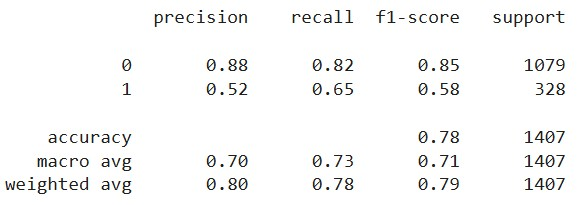

In [28]:
# In this code, we will build a function called ANN
# It will take all the parameters and will build a model
# It will give the classification report as output

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [29]:
# Apply the ANN function on real time data set
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7534 - loss: 0.5282
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7890 - loss: 0.4325
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7985 - loss: 0.4190
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8168 - loss: 0.3996
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8029 - loss: 0.4141
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8020 - loss: 0.4201
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8140 - loss: 0.3994
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8100 - loss: 0.4145
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8056 - loss: 0.4053
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8137 - loss: 0.3881
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8087 - loss: 0.4040
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

### Mitigating Skewdness of Data
* In this section, we will manage the imbalance in the data set by different methods

#### Method 1: Undersampling

In [30]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [31]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [32]:
# Separating dependent and independent set of variables
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

# Train test split the data frame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y) # Stratify = y: make balanced distribution

In [35]:
# Number of classes in training Data
y_train.value_counts() # Effect of stratify = y

,count
Churn,
0,1495
1,1495


In [36]:
# Get the classification report as result of this function
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6648 - loss: 0.6379
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7319 - loss: 0.5346
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7549 - loss: 0.4957
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7659 - loss: 0.4762
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7531 - loss: 0.4965
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7615 - loss: 0.4846
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7671 - loss: 0.4794
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7656 - loss: 0.4736
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7786 - loss: 0.4678
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7808 - loss: 0.4643
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 0.4804
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

### Method2: Oversampling

In [37]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [38]:
# Separating independent and dependent set of variables
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

# Train test split the X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In [39]:
# Number of classes in training Data
y_train.value_counts()

,count
Churn,
1,4130
0,4130


In [40]:
# Get the predictions and get the classification report as the result of this function
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6783 - loss: 0.6035
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7530 - loss: 0.5009
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7634 - loss: 0.4851
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7718 - loss: 0.4786
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7677 - loss: 0.4845
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7738 - loss: 0.4710
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7674 - loss: 0.4729
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7663 - loss: 0.4759
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7804 - loss: 0.4645
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7715 - loss: 0.4748
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7777 - loss: 0.4677
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

### Method 3: SMOTE

In [42]:
# Separating independent and dependent set of variables
X = df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [44]:
# Applying the SMOTE operation
from imblearn.over_sampling import SMOTE # This comes in a libraru called imblearn's over_sampling module

# Creathe the SMOTE object
smote = SMOTE(sampling_strategy= 'minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Check y_sm counts
y_sm.value_counts()

,count
Churn,
0,5163
1,5163


In [45]:
# Train test split the data set
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [47]:
# Number of classes in training Data
y_train.value_counts()

,count
Churn,
1,4130
0,4130


In [46]:
# Get the predictions and get classification report
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6999 - loss: 0.5730
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7773 - loss: 0.4703
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7710 - loss: 0.4691
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7796 - loss: 0.4551
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7786 - loss: 0.4566
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7820 - loss: 0.4493
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7941 - loss: 0.4373
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7913 - loss: 0.4465
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8000 - loss: 0.4378
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4355
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7898 - loss: 0.4393
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

### Method4: Use of Ensemble with undersampling

In [48]:
# Count class wise entries of the 'Churn' column
df2.Churn.value_counts()

,count
Churn,
0,5163
1,1869


In [49]:
# Separating independent and dependent variables as X and y
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [50]:
# Train test split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In [51]:
# Check y_train class wise values
y_train.value_counts()

,count
Churn,
0,4130
1,1495


### Model summary

* model1 --> class1(1495) + class0(0, 1495)

* model2 --> class1(1495) + class0(1496, 2990)

* model3 --> class1(1495) + class0(2990, 4130)

In [52]:
# Making a copy of the X_train data set
df3 = X_train.copy()
df3['Churn'] = y_train

In [53]:
# Separating the data sets for two types of churns
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [54]:
# Define a function that will return the X_train and y_train data sets
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [56]:
# Calculate the train and  test data set and get the classification report
# Model-1
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5005 - loss: 0.6949
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7248 - loss: 0.5517
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7628 - loss: 0.4929
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7603 - loss: 0.5007
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7737 - loss: 0.4800
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7726 - loss: 0.4772
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7698 - loss: 0.4704
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7692 - loss: 0.4755
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7780 - loss: 0.4798
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7781 - loss: 0.4701
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7713 - loss: 0.4804
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy:

In [57]:
# Model-2
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6455 - loss: 0.6443
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7510 - loss: 0.5110
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7572 - loss: 0.4983
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7698 - loss: 0.4782
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7591 - loss: 0.4818
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7758 - loss: 0.4763
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7694 - loss: 0.4784
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7831 - loss: 0.4647
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7808 - loss: 0.4541
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7670 - loss: 0.4777
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7682 - loss: 0.4743
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [58]:
# Model-3:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6324 - loss: 0.6378
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7639 - loss: 0.5129
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7674 - loss: 0.4964
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7744 - loss: 0.4837
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7821 - loss: 0.4720
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7817 - loss: 0.4630
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7628 - loss: 0.4926
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7847 - loss: 0.4560
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7830 - loss: 0.4630
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7798 - loss: 0.4679
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.4580
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [59]:
# Setting the class boundaries as 1 and 0s
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [60]:
# Get the final classification report
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1033
           1       0.51      0.76      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.75      1407

